<a href="https://colab.research.google.com/github/dxmai/CS114.L21.KHCL/blob/main/Colab/Hand%20Written%20Digits%20Recognition/Hand_written_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Báo cáo bài tập colab số 1: Sklearn hand-written digits recognition.**

Nhóm: 

Đặng Xuân Mai             19521820

Nguyễn Thị Thảo Hiền      19521488

Nguyễn Thị Cẩm Hướng      19521594

Nguyễn Hoài Nam           18521126


Tham khảo tại: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py



In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


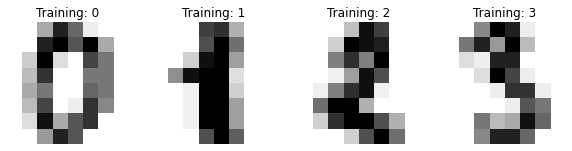

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

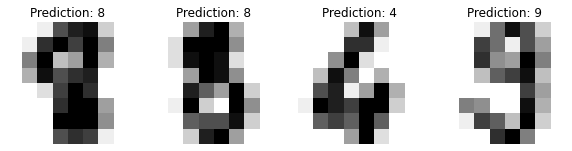

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


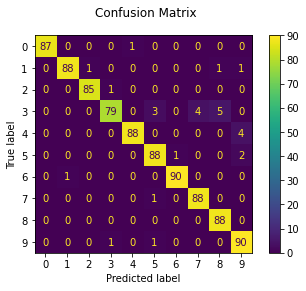

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Code chụp webcam: Import từ Google Colab


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


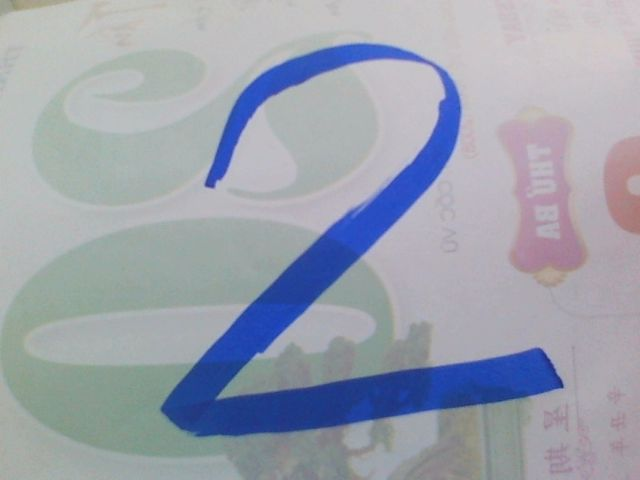

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
    
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Edge detection: Vì hình ảnh đưa vào rất lớn, nếu resize sẽ dẫn đến kết quả không như mong muốn nên dùng edge detection để thu gọn hình ảnh lại.
Tham khảo tại: https://docs.opencv.org/master/da/d22/tutorial_py_canny.html


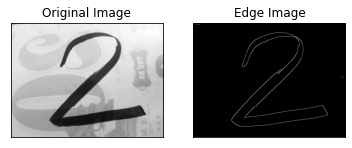

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('photo.jpg',0)
edges = cv.Canny(img,100, 100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Crop image: Cắt hình ảnh (chỉ chú ý đến phần có số)
Tham khảo tại: https://www.codeproject.com/Questions/5263477/How-do-I-crop-a-subimage-from-an-image-with-edge-d

-1

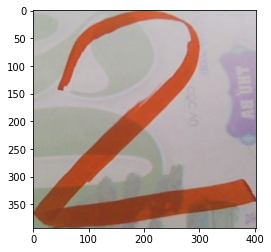

In [ ]:
import cv2
import numpy as np
import matplotlib.image as mpimg #

#img = cv2.imread("test.png")
img = cv2.imread('photo.jpg')
blurred = cv2.blur(img, (3,3))
canny = cv2.Canny(blurred, 50, 200)

## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
cropped = img[y1:y2, x1:x2]
cv2.imwrite("cropped.png", cropped)

tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
implot = plt.imshow(cropped)
cv2.waitKey()

In [ ]:
import cv2
import numpy as np
img = cv2.imread('cropped.png')
img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)


In [ ]:
print(img)
print(img.size)

[[[180 184 178]
  [190 181 178]
  [185 133 113]
  [187 142 124]
  [199 167 160]
  [199 179 177]
  [201 197 202]
  [202 197 203]]

 [[184 183 178]
  [186 139 121]
  [183 177 171]
  [181 180 175]
  [192 187 189]
  [200 146 133]
  [195 188 193]
  [187 180 192]]

 [[179 177 170]
  [191 156 148]
  [188 183 182]
  [179 178 175]
  [193 166 162]
  [197 127 108]
  [193 184 191]
  [182 167 185]]

 [[179 177 173]
  [179 176 173]
  [180 175 175]
  [191 146 137]
  [195 109  85]
  [190 176 178]
  [189 180 186]
  [172 157 178]]

 [[163 167 153]
  [163 165 154]
  [159 126 109]
  [163  90  63]
  [181 168 168]
  [184 175 180]
  [182 174 179]
  [156 145 170]]

 [[170 169 161]
  [170 131 113]
  [172  92  65]
  [171 162 157]
  [165 163 158]
  [177 169 171]
  [179 170 173]
  [177 168 172]]

 [[159 138 121]
  [157  92  61]
  [154 146 137]
  [148 139 130]
  [142 123 109]
  [161 120 106]
  [173 113  93]
  [171 107  87]]

 [[138  84  54]
  [136  75  48]
  [135  70  46]
  [139  75  53]
  [149  95  74]
  [151 110

Tham khảo cách chuyển dữ liệu về scale [0,1] của nhóm:
https://github.com/PhanTung-06/CS114.L21/tree/main/Recognizing_hand-written_digits

In [ ]:
img = img/225*15
img = img.reshape(1, -1)
print(img)

[[12.         12.26666667 11.86666667 12.66666667 12.06666667 11.86666667
  12.33333333  8.86666667  7.53333333 12.46666667  9.46666667  8.26666667
  13.26666667 11.13333333 10.66666667 13.26666667 11.93333333 11.8
  13.4        13.13333333 13.46666667 13.46666667 13.13333333 13.53333333
  12.26666667 12.2        11.86666667 12.4         9.26666667  8.06666667
  12.2        11.8        11.4        12.06666667 12.         11.66666667
  12.8        12.46666667 12.6        13.33333333  9.73333333  8.86666667
  13.         12.53333333 12.86666667 12.46666667 12.         12.8
  11.93333333 11.8        11.33333333 12.73333333 10.4         9.86666667
  12.53333333 12.2        12.13333333 11.93333333 11.86666667 11.66666667
  12.86666667 11.06666667 10.8        13.13333333  8.46666667  7.2
  12.86666667 12.26666667 12.73333333 12.13333333 11.13333333 12.33333333
  11.93333333 11.8        11.53333333 11.93333333 11.73333333 11.53333333
  12.         11.66666667 11.66666667 12.73333333  9.733333

In [ ]:
print(clf.predict(img))
result = clf.predict(img)

ValueError: ignored

Tham khảo cách xuất dữ liệu tại: https://colab.research.google.com/drive/17KUzLnlG-sdaelWnhYVwbugmDAzJvxqc#scrollTo=tsOpCothRKoQ

Text(0.5, 1.0, 'Predict = 1')

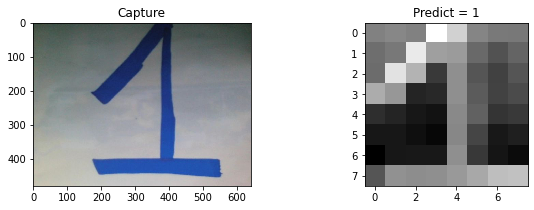

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2 , figsize=(10, 3))
#for ax, image, label in zip(axes, img, result):
#ax.set_axis_off()
cap = axes[0]
cap_img = cv2.imread('photo.jpg')
cap.imshow(cv2.cvtColor(cap_img, cv2.COLOR_BGR2RGB), interpolation='nearest')
cap.set_title('Capture')

res = axes[1]
img = np.reshape(img, (8, 8))
res.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
res.set_title('Predict = %i' % result)